## Support Vector Machines : 

ilk önce bir classificaion algoritması olarak ortaya çıkmıştır. Farklı classları birbirinden ayırmak için kullanılan bir algoritmadır. en iyi support değeri belirler ve classlar arasında ayırım noktası belirler ve bu noktalardan classları ayıracak çizgiyi çizer. Eğer model traing datasını mükemmel test datasını ise kötü tahmin ederse burda bir hard marjin durumu oluşmuştur. Bunu engellemek için C parametresi kullanılır. C parametresi ile regularizasyon değerini ayarlarız ve overfiting durumunu engellemeye çalışırız. 

Kernel Trick : Boyut değiştirme demektir. Kernel ekleyerek datayı bir üst boyuta taşırız. Örneğin datamız 2 boyutlu ise ve ayrımı iyi yapamıyorsa kernel trick ekleyerek araya hyper plane ekleyerek ayrımı daha güzel bir şeklide yapmamıza imkan vermektedir. 

Kernel Funcations : 

1. linear kernel : data linear ise kullanılır. 
2. polyominal
3. rbf
4. sigmoid

Default değeri rbf dir. 

C değeri : değeri arttıkça tahmin etme gücü artar. Logistic regression daki bias değeridir. eğer C parametresi çok artarsa overfiting olur.

Gamma Değeri : ne kadar artarsa modelin kompleksisi artar. yani çizilen plot sayısı artar. çok artarsa overfiting meydana gelir.

Eğer linear kullanılacaksa sadece C parametresi, nonlinear kullanılacaksa C and Gamma değeri kullanılacaktır. 

SVM outlier konusuna çok duyarlıdır. 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df=pd.read_csv("mouse_viral_study.csv")
df.head()
# 1 ler virüslü, 0 lar virüsü geçenler.
# Med_1_mL 1. ilaç
# Med_2_mL 2. ilaç

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


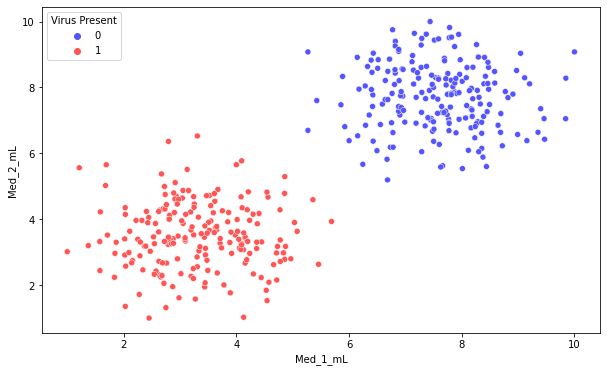

In [8]:
sns.scatterplot(x = df["Med_1_mL"], y= df["Med_2_mL"], hue = df["Virus Present"], palette="seismic");
# datada ki değerler çok iyi ayrılmış.

In [9]:
df.describe().T
# outlier değer yok. değerler arasında ciddi bir fark yok.

,count,mean,std,min,25%,50%,75%,max
Med_1_mL,400.000,5.448,2.319,1.000,3.249,5.394,7.630,10.000
Med_2_mL,400.000,5.617,2.337,1.000,3.431,5.638,7.783,10.000
Virus Present,400.000,0.500,0.501,0.000,0.000,0.500,1.000,1.000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [11]:
df["Virus Present"].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

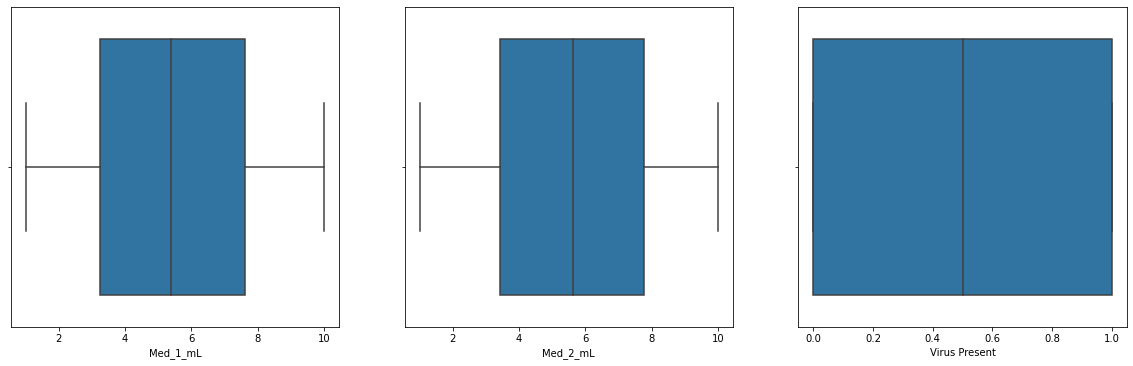

In [12]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes([float, int]).columns:
    index += 1
    plt.subplot(3,3,index)
    sns.boxplot(df.select_dtypes([float, int])[i], whis= 1.5)

In [13]:
df.corr()["Virus Present"].drop("Virus Present").sort_values()

Med_1_mL   -0.922
Med_2_mL   -0.904
Name: Virus Present, dtype: float64

### Test_Train : 

In [14]:
X = df.drop("Virus Present", axis=1)
y = df["Virus Present"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Standart scale, Model and Pipline : 

In [18]:
from sklearn.svm import SVC
# SVC dememizin sebebi targetımızın categoric olması. bu bir classificationdur.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
operations = [("scaler", StandardScaler()), ("svc", SVC())]
Pipeline(steps=operations)
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

### Metrics : 

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [22]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[42  0]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Train_Set
[[158   0]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       162

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



### Cross Validate Controll : 

In [24]:
from sklearn.model_selection import cross_validate

operations = [('scaler',StandardScaler()),('svm',SVC())]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   1.000
test_recall      1.000
test_f1          1.000
test_accuracy    1.000
dtype: float64

### With Best Parameters (GridsearchCV) : 

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
operations = [("scaler", StandardScaler()), ("svc", SVC())]
Pipeline(steps=operations)
pipe_model = Pipeline(steps=operations)

In [28]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'svc': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [31]:
param_grid = {'svc__C': np.linspace(0,10,100),
              'svc__gamma': ["scale", "auto", 0.2, 0.3],
              'svc__kernel': ['rbf', 'linear']}

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="recall", cv=10)
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.2...
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                         'svc__gamma': ['scale', 'auto', 0.2, 0.3],
                         'svc__kernel': ['rbf', 'linear']},


In [32]:
svm_model_grid.best_params_

{'svc__C': 0.10101010101010101, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [33]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[42  0]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Train_Set
[[158   0]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       162

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



### ROC and AUC : 

In [34]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve

In [38]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)
svc_basic_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(probability=True, random_state=42))])

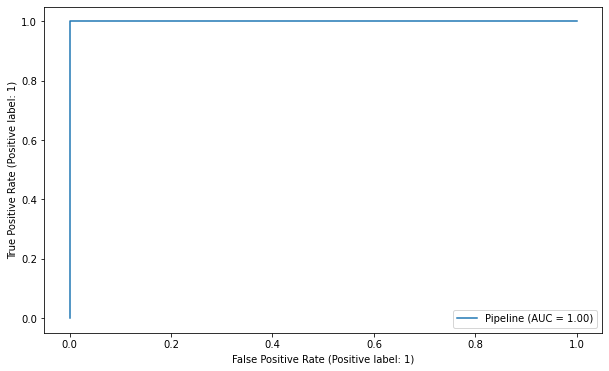

In [39]:
plot_roc_curve(svc_basic_model, X_train, y_train);

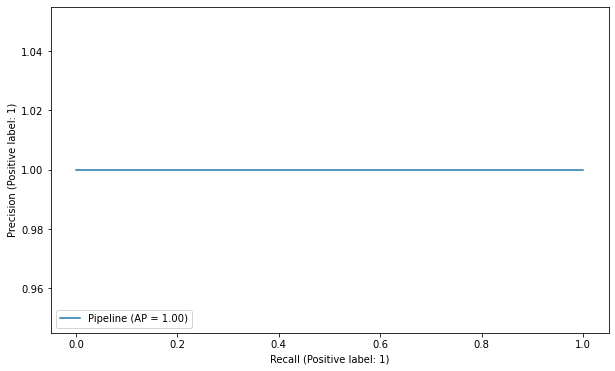

In [40]:
plot_precision_recall_curve(svc_basic_model, X_train, y_train);

### Final Model : 

In [60]:
svm_model_grid.best_params_

{'svc__C': 0.10101010101010101, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [61]:
operations = [('scaler',StandardScaler()),('knn',SVC(C=0.10101010101010101, gamma='scale', kernel='rbf'))]
pipe_final = Pipeline(operations)
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', SVC(C=0.10101010101010101))])

In [62]:
data = X.head(7)

In [63]:
pred = pipe_final.predict(data)
data["gercek"] = y.head(7)
data["tahmin"] = pred
data

,Med_1_mL,Med_2_mL,gercek,tahmin
0,6.508,8.583,0,0
1,4.126,3.073,1,1
2,6.428,6.370,0,0
3,3.673,4.905,1,1
4,1.580,2.441,1,1
5,2.158,2.745,1,1
6,8.172,7.329,0,0


## Diabets Dataset : 

In [64]:
df=pd.read_csv("diabetes.csv")
df.head()
# 1 ler şeker hastası 0 lar sağlıklı.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [67]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

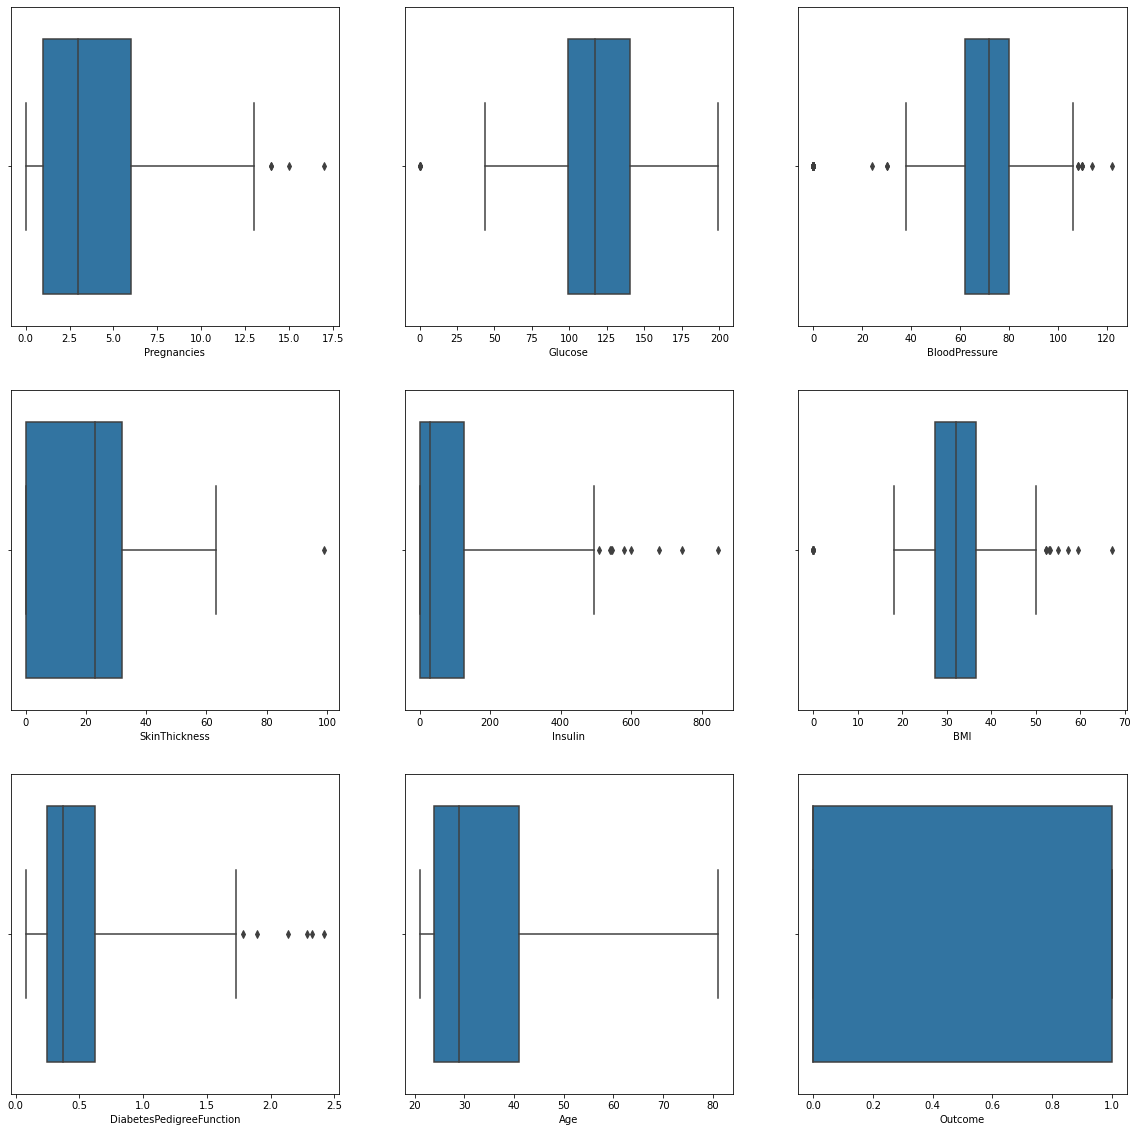

In [70]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes([float, int]).columns:
    index += 1
    plt.subplot(3,3,index)
    if i == "DiabetesPedigreeFunction" or i == "Insulin" or i == "Age" : 
        sns.boxplot(df.select_dtypes([float, int])[i], whis=3.0)
    else : 
        sns.boxplot(df.select_dtypes([float, int])[i])

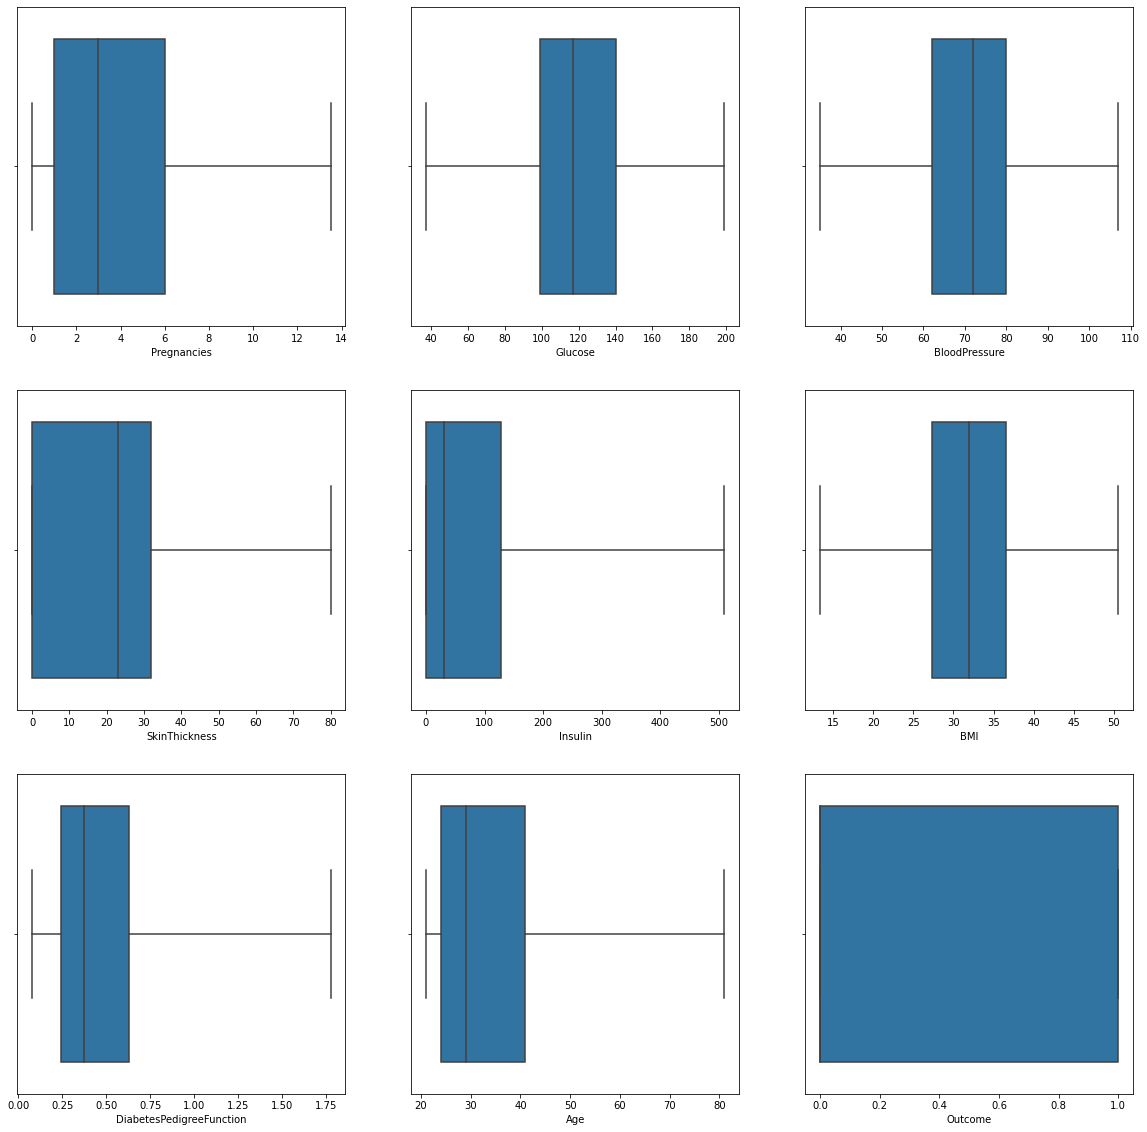

In [71]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes([float, int]).columns:
    index += 1
    plt.subplot(3,3,index)
    if i == "DiabetesPedigreeFunction" or i == "Insulin" or i == "Age" : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(3.0*IQR)
        ust_sinir = Q3+(3.0*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        sns.boxplot(df.select_dtypes([float, int])[i], whis=3.0)
    else :  
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.5*IQR)
        ust_sinir = Q3+(1.5*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        sns.boxplot(df.select_dtypes([float, int])[i], whis=1.5)

In [73]:
df.corr()["Outcome"].drop("Outcome").sort_values()

SkinThickness              0.073
BloodPressure              0.113
Insulin                    0.133
DiabetesPedigreeFunction   0.174
Pregnancies                0.220
Age                        0.238
BMI                        0.310
Glucose                    0.479
Name: Outcome, dtype: float64

### Train Test Split , default model and scalling : 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [81]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

operations = [("scaler", StandardScaler()), ("svm", SVC(random_state=42))]
Pipeline(steps=operations)
svm_model = Pipeline(steps=operations)
svm_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

### Metrics : 

In [82]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[83 17]
 [21 33]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Train_Set
[[372  28]
 [ 72 142]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       400
           1       0.84      0.66      0.74       214

    accuracy                           0.84       614
   macro avg       0.84      0.80      0.81       614
weighted avg       0.84      0.84      0.83       614



### Cross Validate Control : 

In [83]:
operations = [('scaler',StandardScaler()),('svm',SVC(random_state=42))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.719
test_recall      0.584
test_f1          0.639
test_accuracy    0.772
dtype: float64

### GridSearchCV best parameter : 

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# ROC and AUC için probability=True yapılmalıdır. 

operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model2 = Pipeline(steps=operations)

In [87]:
pipe_model2.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('SVC', SVC(class_weight='balanced', probability=True, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(class_weight='balanced', probability=True, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': 'balanced',
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': True,
 'SVC__random_state': 42,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [90]:
param_grid = {'SVC__C': np.linspace(0,10,100),
              'SVC__gamma': ["scale", "auto", np.linspace(0,10,98)],
              'SVC__kernel': ['rbf', 'linear']}

svm_model_grid = GridSearchCV(pipe_model2, param_grid, scoring="recall", cv=6)

svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.7...
        6.70103093,  6.80412371,  6.90721649,  7.01030928,  7.11340206,
        7.21649485,  7.31958763,  7.42268041,  7.5257732 ,  7.62886598,
        7.73195876,  7.83505155,  7.93814433,  8.04123711,  8.1443299 ,
        8.24742268,  8.35051546,  8.45360825,  8.55670103,  8.65979381,
        8.7628866 ,  8.86597938,  8.96907216,  9.07216495,  9.17525773,
        9.2783505

In [91]:
svm_model_grid.best_params_

{'SVC__C': 0.10101010101010101, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

In [92]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[60 40]
 [10 44]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       100
           1       0.52      0.81      0.64        54

    accuracy                           0.68       154
   macro avg       0.69      0.71      0.67       154
weighted avg       0.74      0.68      0.68       154


Train_Set
[[281 119]
 [ 39 175]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       400
           1       0.60      0.82      0.69       214

    accuracy                           0.74       614
   macro avg       0.74      0.76      0.73       614
weighted avg       0.78      0.74      0.75       614



### Best Threshold : 

In [93]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [94]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))] # probability=True olmalıdır.
svc_basic_model = Pipeline(steps=operations)

svc_basic_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(probability=True, random_state=42))])

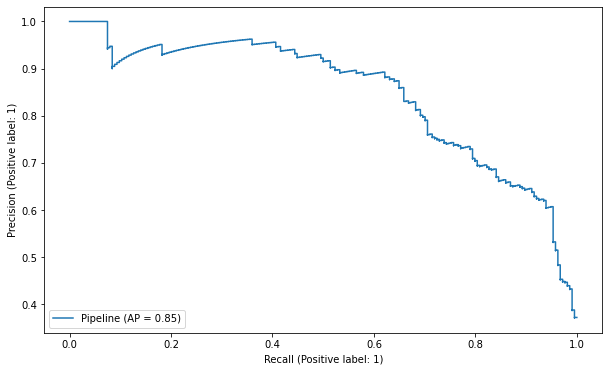

In [99]:
plot_precision_recall_curve(svc_basic_model, X_train, y_train);
# dengesiz olduğu için direk plot_precision_recall_curve dedik.

In [96]:
y_pred_proba = svc_basic_model.predict_proba(X_train)

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

# data dengesiz olduğu için direk bu şekilde bulduk.

0.36789037607698744

In [97]:
# best parametreler ile en iyi threshold ile denedik : 

y_pred2 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[65 35]
 [13 41]]
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       100
           1       0.54      0.76      0.63        54

    accuracy                           0.69       154
   macro avg       0.69      0.70      0.68       154
weighted avg       0.73      0.69      0.70       154



In [102]:
y_train_pred = pd.Series(svm_model_grid.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[300 100]
 [ 51 163]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       400
           1       0.62      0.76      0.68       214

    accuracy                           0.75       614
   macro avg       0.74      0.76      0.74       614
weighted avg       0.77      0.75      0.76       614



In [103]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [104]:
svm_model_grid.best_params_

{'SVC__C': 0.10101010101010101, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

In [105]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.10101010101010101, gamma="scale", kernel= 'rbf', probability=True, 
                                                        class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)
CV(10, model, X_train, y_train, optimal_threshold)

Accuracy      74.26%  std 4.23%
Precision-1   60.84%  std 5.19%
Recall-1      74.74%  std 6.90%
F1_score-1    66.92%  std 5.14%


In [107]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
default = Pipeline(steps=operations)
CV(10, default, X_train, y_train, 0.5)

Accuracy      76.07%  std 5.19%
Precision-1   68.79%  std 9.15%
Recall-1      58.94%  std 8.68%
F1_score-1    63.13%  std 7.80%
